In [2]:
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit import QuantumCircuit
import numpy as np
from numpy import sqrt
from IPython.display import display, Latex, Math

from qiskit import __version__
print(__version__)

2.2.3


In [3]:
# Define commononly used statevectors
zero = Statevector(np.array([[1], [0]]))
one = Statevector(np.array([[0], [1]]))

plus = Statevector.from_label("+")
minus = Statevector.from_label("-")

plus_im = Statevector.from_label("r")
minus_im = Statevector.from_label("l")

# Define commonly used operators
H = Operator.from_label("H")
Id = Operator.from_label("I")
X = Operator.from_label("X")
Z = Operator.from_label("Z")
CX = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

### 🔵 1. Identify which of the following 2-qubit states are entangled:

a.  $\frac{1}{\sqrt{2}}\big(\ket{00} + \ket{11}\big)$

b.  $\frac{1}{\sqrt{2}}\big(\ket{00} + \ket{01}\big)$

c.  $\ket{+}\otimes\ket{0}$

d.  $\frac{1}{\sqrt{3}}\big(\ket{01}+\ket{10}+\ket{11}\big)$

In [4]:
# Import helper function
import sys
import os

# Add the repo root to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(repo_root)

from utils.separability_checks import (
    is_separable,
    print_partition_classification,
    print_partition_schmidt,
    classify_all_bipartitions,
    visualize_all_bipartitions
)

In [5]:
# Part a
HoI = H.tensor(Id) 
# Compose CX with HoI so the resulting operator acts on the same 2-qubit system.
# Using tensor here created a 4-qubit operator and caused the dimension mismatch.
CXoHoI = CX @ HoI  # apply HoI first, then CX

zero_o_zero = zero.tensor(zero)

state_a = zero_o_zero.evolve(CXoHoI)
print(f'State a:')
display(state_a.draw('latex'))

print_partition_classification(state_a, 1)    # compute Schmidt rank of corresponding 'qubit matrix' and print result

State a:


<IPython.core.display.Latex object>

Partition 1 | 1: entangled 💞


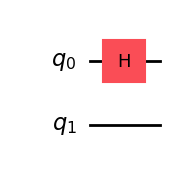

State b:


<IPython.core.display.Latex object>

Partition 1 | 1: separable 💕


In [6]:
# Part b
qc_b = QuantumCircuit(2)
qc_b.h(0)
display(qc_b.draw('mpl'))

state_b = (zero ^ zero).evolve(qc_b)


print(f'State b:')
display(state_b.draw('latex'))
print_partition_classification(state_b, 1)

In [7]:
state_c = zero.tensor(plus)
print(f'State c:')
display(state_c.draw('latex'))
print_partition_classification(state_c, 1)

State c:


<IPython.core.display.Latex object>

Partition 1 | 1: separable 💕


In [8]:
state_d = (np.kron(zero.data, one.data)
           + np.kron(one.data, zero.data)
           + np.kron(one.data, one.data)) / np.sqrt(3)

state_d = Statevector(state_d)
print(f"State d:")
display(state_d.draw('latex'))
print_partition_classification(state_d,1)

State d:


<IPython.core.display.Latex object>

Partition 1 | 1: entangled 💞


### 🔵 2. Define a 3-qubit operator $U=H\otimes X \otimes Z$. Apply to the GHZ state.
Where $$\text{GHZ} = \frac{1}{\sqrt{2}}\big(\ket{000} + \ket{111}).$$

Task:
- Determine the final statevector.
- Is it still entangled? (Hint: yes, but what kind?)                               

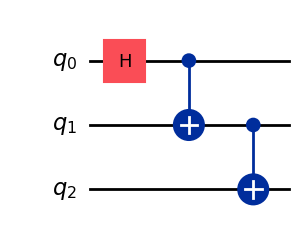


 Initial statevector:


<IPython.core.display.Latex object>

In [9]:
import matplotlib.pyplot as plt

qc = QuantumCircuit(3, name="GHZ‑prep")
qc.h(0)          # Hadamard on qubit 0
qc.cx(0, 1)      # CNOT 0→1
qc.cx(1, 2)      # CNOT 1→2

display(qc.draw("mpl"))


state_initial = Statevector.from_instruction(qc)

print("\n Initial statevector:")
display(state_initial.draw("latex"))                     # shows the complex amplitude

U:


<IPython.core.display.Latex object>

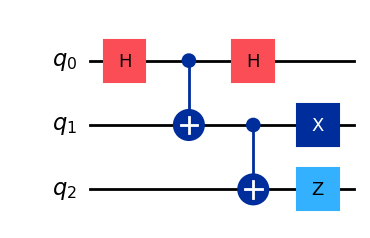

Final statevector:


<IPython.core.display.Latex object>

Subsystem A (qubits),Subsystem B (qubits),Status,Schmidt Coefficients
1,2,entangled 💞,"0.7071, 0.7071"
2,1,entangled 💞,"0.7071, 0.7071"


In [10]:
u_circ = QuantumCircuit(3, name="U")
u_circ.h(0)
u_circ.x(1)
u_circ.z(2)

U = Operator(u_circ)
print("U:")
display(U.draw("latex"))

qc_combined = qc.compose(u_circ)
display(qc_combined.draw('mpl'))

state_final = state_initial.evolve(U)
print("Final statevector:")
display(state_final.draw("latex"))
visualize_all_bipartitions(state_final)

### 🔵 3. Construct a 3-qubit state, measure qubits [0] and [2], and compute the conditional probability distribution of the remaining qubit.

Task:
- Choose your own unique superposition.
- Perform sequential measurements.
- Compute $P(q_1=0 | q_0, q_2)$.

Think about: 
- Bayesian updating in quantum measurements
- How measurements reduce the state dimension


In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
import numpy as np 
from numpy import sqrt

from IPython.display import display, Latex, Math

from qiskit import __version__
print(__version__)

2.2.3


1. Build the 3-state qubit state using `Statevector`
- Qubit 0: Alice's (Clancy's) qubit
- Qubit 1: the Referee's qubit
- Qubit 2: Bob's (Torchbearer's) qubit

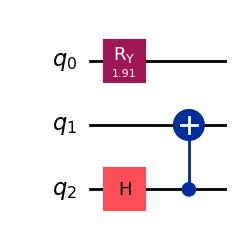

Initial statevector for



<IPython.core.display.Latex object>

In [14]:
qc = QuantumCircuit(3)

# Create Bell pair between qubit 0 (Clancy) and qubit 1 (Referee)
qc.h(2)
qc.cx(2, 1)

# Custom superposition on qubit 2 ()
# Example: |psi> = sqrt(1/3)|0> + \sqrt(2/3)|1>
theta = 2 * np.arccos(np.sqrt(1/3))
qc.ry(theta, 0)

display(qc.draw('mpl'))

# Convert to statevector
sv = Statevector.from_instruction(qc)
print("Initial statevector for\n")
display(sv.draw("latex"))

2. Define CHSH measurement bases for Alice (Clancy) and Bob (Torchbearer)

